<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Kolkata_Household_Electric_Power_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and preprocess the dataset

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [238]:
df=pd.read_csv("/content/kolkata_electricity_consumption.csv")

In [239]:
df.head()

,date,time,day_of_week,temperature,humidity,weather,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs
0,2023-01-01,00:00:00,Sunday,30.483571,65,sunny,3,4,1.304701,5.16,6.73
1,2023-01-01,00:30:00,Sunday,27.308678,81,sunny,5,6,1.797391,5.49,9.87
2,2023-01-01,01:00:00,Sunday,31.238443,52,sunny,3,4,1.301990,5.44,7.08
3,2023-01-01,01:30:00,Sunday,35.615149,69,cloudy,4,5,1.606172,5.40,8.67
4,2023-01-01,02:00:00,Sunday,26.829233,91,rainy,2,4,0.441487,5.27,2.33


In [240]:
df.describe()

,temperature,humidity,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,28.053293,67.193076,3.000456,3.993897,2.607920,5.783749,15.733479
std,4.862376,15.912808,1.415141,1.640226,2.129549,0.663307,12.912360
min,18.000000,40.000000,1.000000,1.000000,0.016622,5.040000,0.780000
25%,24.673946,53.000000,2.000000,3.000000,1.032016,5.270000,5.690000
50%,28.034311,67.000000,3.000000,4.000000,1.973755,5.500000,10.670000
75%,31.386359,81.000000,4.000000,5.000000,3.707580,6.180000,22.010000
max,40.000000,94.000000,5.000000,7.000000,26.562218,7.690000,65.690000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17532 entries, 0 to 17531
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       17532 non-null  object 
 1   time                       17532 non-null  object 
 2   day_of_week                17532 non-null  object 
 3   temperature                17532 non-null  float64
 4   humidity                   17532 non-null  int64  
 5   weather                    17532 non-null  object 
 6   occupancy                  17532 non-null  int64  
 7   number_of_appliances_used  17532 non-null  int64  
 8   total_energy_kwh           17532 non-null  float64
 9   tariff_rs_per_kwh          17532 non-null  float64
 10  total_electricity_bill_rs  17532 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [242]:
#converting date to dateTime
df['date']=pd.to_datetime(df['date'])

In [243]:
df.drop(columns=['time','day_of_week','weather'],inplace=True)

In [244]:
df.head()

,date,temperature,humidity,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs
0,2023-01-01,30.483571,65,3,4,1.304701,5.16,6.73
1,2023-01-01,27.308678,81,5,6,1.797391,5.49,9.87
2,2023-01-01,31.238443,52,3,4,1.301990,5.44,7.08
3,2023-01-01,35.615149,69,4,5,1.606172,5.40,8.67
4,2023-01-01,26.829233,91,2,4,0.441487,5.27,2.33


## Feature engineering: extract date, time, month

In [245]:
df['month']=df['date'].dt.to_period('M')
df['day']=df['date'].dt.to_period('D')

In [246]:
df.head()

,date,temperature,humidity,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs,month,day
0,2023-01-01,30.483571,65,3,4,1.304701,5.16,6.73,2023-01,2023-01-01
1,2023-01-01,27.308678,81,5,6,1.797391,5.49,9.87,2023-01,2023-01-01
2,2023-01-01,31.238443,52,3,4,1.301990,5.44,7.08,2023-01,2023-01-01
3,2023-01-01,35.615149,69,4,5,1.606172,5.40,8.67,2023-01,2023-01-01
4,2023-01-01,26.829233,91,2,4,0.441487,5.27,2.33,2023-01,2023-01-01


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17532 entries, 0 to 17531
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       17532 non-null  datetime64[ns]
 1   temperature                17532 non-null  float64       
 2   humidity                   17532 non-null  int64         
 3   occupancy                  17532 non-null  int64         
 4   number_of_appliances_used  17532 non-null  int64         
 5   total_energy_kwh           17532 non-null  float64       
 6   tariff_rs_per_kwh          17532 non-null  float64       
 7   total_electricity_bill_rs  17532 non-null  float64       
 8   month                      17532 non-null  period[M]     
 9   day                        17532 non-null  period[D]     
dtypes: datetime64[ns](1), float64(4), int64(3), period[D](1), period[M](1)
memory usage: 1.3 MB


## Aggregate data to Daily level

In [248]:
agg_dict = {
    'temperature': 'mean',
    'humidity': 'mean',
    'occupancy': 'mean',
    'number_of_appliances_used': 'mean',
    'total_energy_kwh': 'mean',
    'tariff_rs_per_kwh': 'mean',
    'total_electricity_bill_rs': 'mean'
}
daily_df=df.groupby('day').agg(agg_dict).reset_index()
daily_df['month']=daily_df['day'].dt.month
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype    
---  ------                     --------------  -----    
 0   day                        366 non-null    period[D]
 1   temperature                366 non-null    float64  
 2   humidity                   366 non-null    float64  
 3   occupancy                  366 non-null    float64  
 4   number_of_appliances_used  366 non-null    float64  
 5   total_energy_kwh           366 non-null    float64  
 6   tariff_rs_per_kwh          366 non-null    float64  
 7   total_electricity_bill_rs  366 non-null    float64  
 8   month                      366 non-null    int64    
dtypes: float64(7), int64(1), period[D](1)
memory usage: 25.9 KB


In [249]:
daily_df.head()

,day,temperature,humidity,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs,month
0,2023-01-01,26.973513,66.208333,3.229167,4.062500,2.589254,5.835208,15.991458,1
1,2023-01-02,27.975173,68.250000,3.145833,4.041667,2.881207,5.909167,17.367292,1
2,2023-01-03,27.895506,66.562500,2.687500,3.666667,2.194072,5.688542,13.815000,1
3,2023-01-04,28.569368,62.875000,3.166667,4.041667,2.640841,5.792917,16.420000,1
4,2023-01-05,28.402290,67.479167,3.062500,4.291667,2.641512,5.819375,17.001875,1


## Aggregate Data To Monthly Level

In [250]:
agg_dict = {
    'temperature': 'mean',
    'humidity': 'mean',
    'occupancy': 'mean',
    'number_of_appliances_used': 'mean',
    'total_energy_kwh': 'sum',
    'tariff_rs_per_kwh': 'mean',
    'total_electricity_bill_rs':'sum'
}
monthly_df=daily_df.groupby('month').agg(agg_dict).reset_index()
monthly_df['occupancy']=monthly_df['occupancy'].astype(int)
monthly_df['number_of_appliances_used']=monthly_df['number_of_appliances_used'].astype(int)
daily_df['month']=df['date'].dt.to_period('M')

In [251]:
monthly_df.head(32)

,month,temperature,humidity,occupancy,number_of_appliances_used,total_energy_kwh,tariff_rs_per_kwh,total_electricity_bill_rs
0,1,28.278669,67.514974,3,4,82.290283,5.780495,502.336667
1,2,28.151225,68.103423,2,3,74.092592,5.781964,443.614583
2,3,27.845387,66.508737,2,3,78.343865,5.761257,471.953125
3,4,27.893219,67.416667,3,4,77.540623,5.784021,468.510000
4,5,27.863707,67.704301,3,3,81.386419,5.779388,487.167083
5,6,28.149487,67.292361,2,4,76.747900,5.787319,471.357083
6,7,27.953028,66.886425,2,3,79.726304,5.776949,480.207500
7,8,28.003336,67.031586,2,3,81.357094,5.790222,489.542292
8,9,28.052620,66.980556,3,4,78.728524,5.789271,480.103750
9,10,28.169848,66.954973,2,3,80.835741,5.787762,485.570208


## Exploratory Data Analysis (EDA)

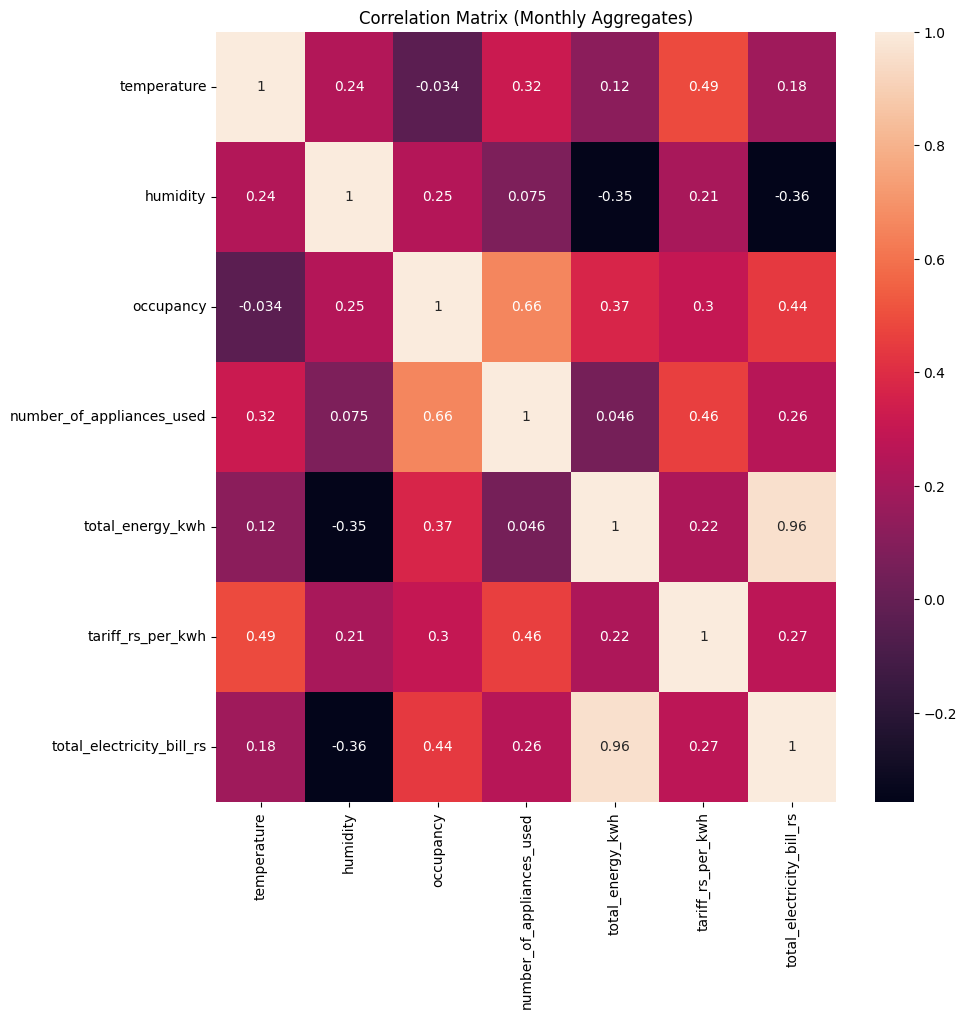

In [253]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(monthly_df.drop('month', axis=1).corr(), annot=True)
plt.title("Correlation Matrix (Monthly Aggregates)")
plt.show()

we can see high correlations among occupancy,number of appliance used to monthly bill